## **Analysing Infrastructures in Singapore**

Name : Wong Thai Siang

Title : Discovering the Factors Affecting Resale Prices of HDB flats in Singapore.

        
<hr>

For my first analysis, I want to find out whats the distribution of resale prices of HDB flats. I will be conducting this analysis by using the most recent dataset of the resale flats.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

## Analysis 1

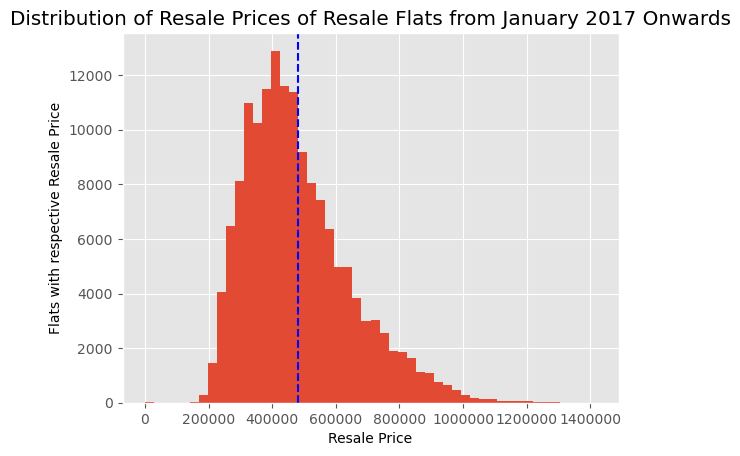

In [21]:



data = np.genfromtxt("./datasets/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",
                     dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',  'U20',  'i8'], delimiter=",",names=True)
price = data[:]["resale_price"]

plt.title('Distribution of Resale Prices of Resale Flats from January 2017 Onwards')
plt.ylabel('Flats with respective Resale Price')
plt.xlabel("Resale Price")
plt.style.use("ggplot")
plt.hist(price, bins =50)
plt.ticklabel_format(style='plain', axis='x')
avg_price = price.mean()
plt.axvline(avg_price, color='b', linestyle='--', label="Mean")

plt.show()

In [22]:

# unique_town = np.unique(data[:]["town"])
# avg_price = []
# for i in unique_town:
#     indices = np.where(town == i)
#     tem_avg = np.mean(data[indices]['resale_price'])
#     tem_avg = int(tem_avg)
#     avg_price.append(tem_avg)

# summary = np.vstack((unique_town,avg_price)).T
# sort_summary = summary[summary[:,1].argsort()]
# bot_3 = sort_summary[:3]
# print(bot_3[1])


## Analysis 2
<h3>"How much has each flat type's resale price increased since 1990? "</h3>
<br>





C:\Users\jerem\AppData\Local\Temp\ipykernel_22628\4050982383.py:43: RuntimeWarning: Mean of empty slice.
  avg_price = resale_price.mean()


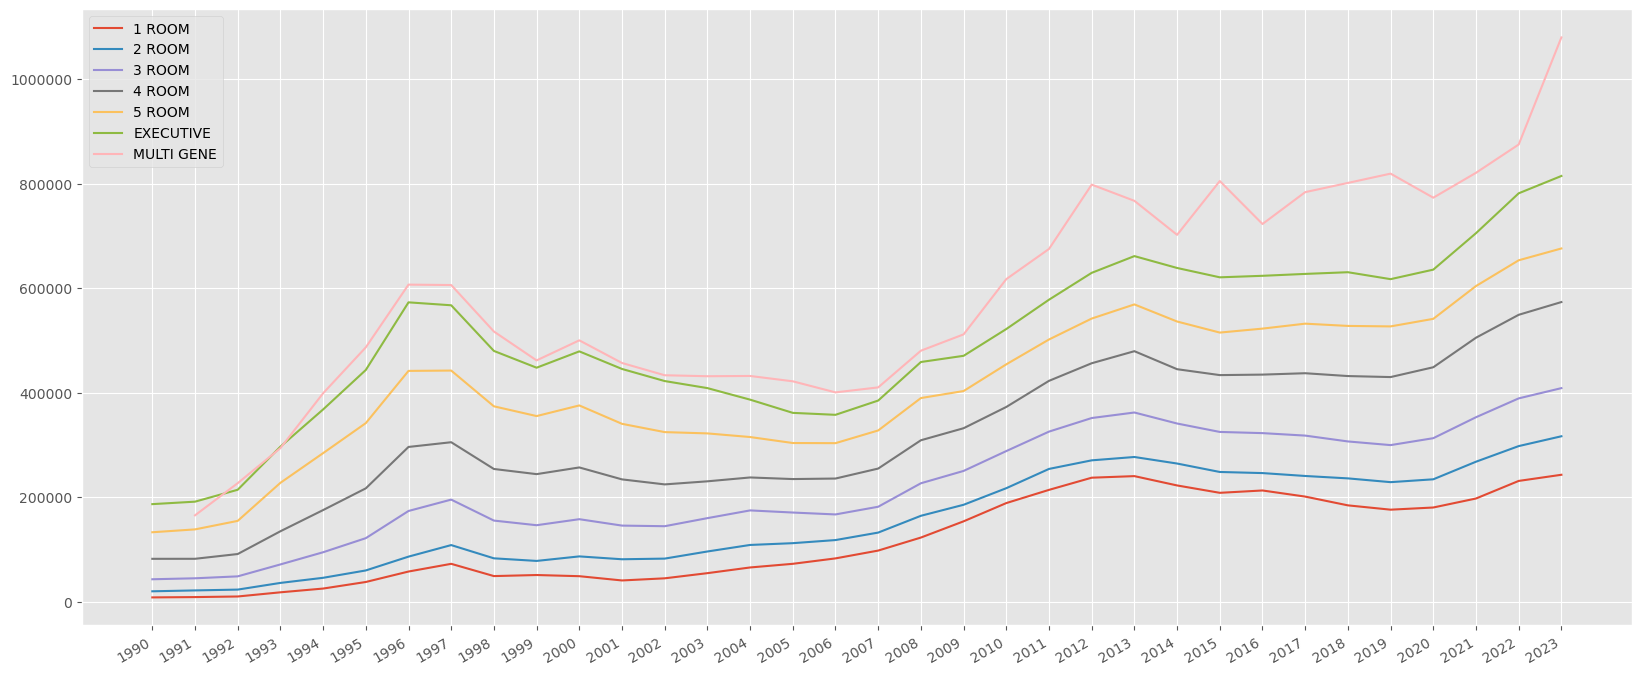

{'1 ROOM': [[7890.540540540541], [8501.56862745098], [9648.979591836734], [17634.615384615383], [24824.69135802469], [37398.73417721519], [57417.27272727273], [72173.55357142857], [48706.25], [50735.25179856115], [48500.0], [40334.61538461538], [44427.27272727273], [54306.976744186046], [65204.76190476191], [72195.65217391304], [82575.0], [97550.0], [122473.68421052632], [153544.44444444444], [188476.19047619047], [213750.0], [237062.5], [240083.33333333334], [222225.0], [208111.11111111112], [212600.0], [200888.88888888888], [184111.11111111112], [175842.54545454544], [180000.0], [197222.22222222222], [230888.8], [242666.66666666666]], '2 ROOM': [[19571.09756097561], [21257.811158798282], [22828.472222222223], [35625.55240793201], [45405.5023923445], [59497.69476082004], [85941.8476821192], [108069.96086105675], [82706.78270042194], [77728.41463414633], [86397.6618705036], [80914.53703703704], [82158.20307692308], [95792.87544483985], [108307.47368421052], [111717.40127388535], [11766

In [111]:
# Merging resale prices from 1990
data1990_1999 = np.genfromtxt('./datasets/resale-flat-prices-based-on-approval-date-1990-1999.csv',
                               dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8', 'i8'], delimiter = ",", names = True)
data2000_2012 = np.genfromtxt('./datasets/resale-flat-prices-based-on-approval-date-2000-feb-2012.csv',
                               dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',  'i8'], delimiter = ",", names=True)
data2012_2014 = np.genfromtxt('./datasets/resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv',
                               dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',   'i8'],
                                delimiter=",",names=True)
data2014_2016 = np.genfromtxt('./datasets/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv',
                               dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',    'i8'],
                                usecols=(0,1,2,3,4,5,6,7,8,10),delimiter=",",names=True)
data2017_onwards = np.genfromtxt('./datasets/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv',
                                  dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',    'i8'],
                                   usecols=(0,1,2,3,4,5,6,7,8,10), delimiter=",",names=True)

combined_data = np.concatenate((data1990_1999, data2000_2012, data2012_2014, data2014_2016, data2017_onwards))

for i in range(len(combined_data)):
    # change month to year
    combined_data[i]['month'] = combined_data[i]["month"][:4]
    # fixing inconsistent naming for multi gene
    if combined_data[i]['flat_type'] == 'MULTI-GENE':
        combined_data[i]['flat_type'] = "MULTI GENE"

years = np.unique(combined_data['month'])
flats = np.unique(combined_data['flat_type'])


rooms =  {
     '1 ROOM': [],
     '2 ROOM': [],
     '3 ROOM': [],
     '4 ROOM': [],
     '5 ROOM': [],
     'EXECUTIVE' :[],
     'MULTI GENE': [],
     'years': years
}

for i in years:
    for n in flats:
        resale_price = combined_data[(combined_data['flat_type'] == n) & (combined_data['month'] == i)]['resale_price']
        avg_price = resale_price.mean()

        rooms[n].append([avg_price]) 

fig,ax = plt.subplots(1,figsize=(20,8))


plt.plot('years','1 ROOM',data=rooms, )
plt.plot('years','2 ROOM',data=rooms, )
plt.plot('years','3 ROOM',data=rooms,)
plt.plot('years','4 ROOM',data=rooms, )
plt.plot('years','5 ROOM',data=rooms, )
plt.plot('years','EXECUTIVE',data=rooms, )
plt.plot('years','MULTI GENE',data=rooms, )
plt.ticklabel_format(style='plain', axis='y')
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.legend()
plt.show()



In [24]:

plt.style.use('ggplot')

data = np.genfromtxt('./datasets/median-rent-by-town-and-flat-type.csv', dtype = ['U32','U32','U32','i8'], delimiter=",", names = True, missing_values=['na','-'], filling_values= 0 )
data1 = np.genfromtxt("./datasets/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",
                     dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',  'U20',  'i8'], delimiter=",",names=True)

#extracting years from data
years = np.unique([row[0][:4] for row in data])
indicies = np.where(years < '2017')
new_years = np.delete(years,indicies)

print(data["quarter"][:])
print(new_years)
index = []
for n in range(len(data)):
    for i in new_years:
        if i in data['quarter'][n]:
            index.append(n)
        
uniq_flats = np.unique(data["flat_type"])
plot_data1 = []

for n in uniq_flats:
    loc = np.where(data[7379:]['flat_type'] == n)
    plot_data1.append(int(np.median(data['median_rent'][loc])))
    


    
print(plot_data1)

['2005-Q2' '2005-Q2' '2005-Q2' ... '2022-Q4' '2022-Q4' '2022-Q4']
['2017' '2018' '2019' '2020' '2021' '2022']
[1100, 0, 0, 0, 900, 1500]


For analysis 3, I will be finding the relationship between the storey range and price of resale flats. I will be using the dataset of HDB resale prices from 2017 onwards. This will be illustrated through a series of bar graphs.

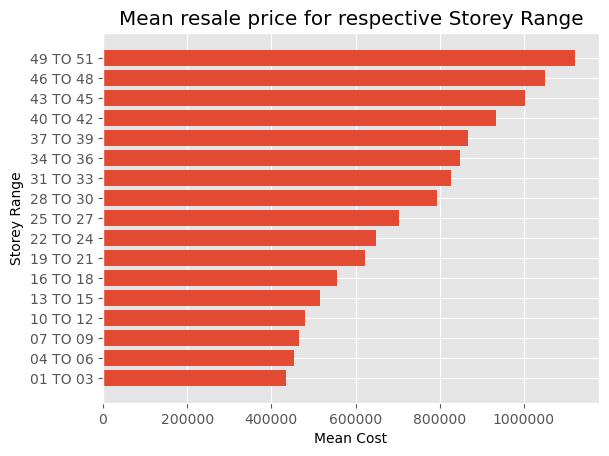

In [25]:


data = np.genfromtxt("./datasets/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv",
                     dtype = ['U10', 'U20',  'U10',  'i8', 'U50', 'U10',  'i4',  'U20', 'i8',  'U20',  'i8'], delimiter=",",names=True)

listOfStoreys = np.unique(data[:]["storey_range"])
listOfMean = []
for i in listOfStoreys:
    indicies = np.where(data[:]["storey_range"] == i)
    tem_sum = data[indicies]["resale_price"].mean()
    listOfMean.append(tem_sum)

fig, ax = plt.subplots()
plt.style.use("ggplot")
plt.title("Mean resale price for respective Storey Range")
plt.ylabel("Storey Range")
plt.xlabel("Mean Cost")
plt.ticklabel_format(style='plain', axis='x')
ax.barh(listOfStoreys,listOfMean)
plt.show()

From the above bar graph, we can conclude that the higher the storey range, the higher the resale price. This tells me that there is a demand for high-rise HDB buildings and Resale Flats in Singapore.

For Analysis 4,

The question for this analysis is: "What is the most popular HDB type among resale flats?"

I will be using the dataset I have found on data.gov.sg, "Number of Resale Applications Registered by Flat Type, by Quarter".

My hypothesis is that the Number of Resale Applications will increase as the Number of Rooms in the Flat Type increases.

Through my data representation, I will find a conclusion to this question.

['1-ROOM' '2-ROOM' '3-ROOM' '4-ROOM' '5-ROOM' 'EXEC']


C:\Users\jerem\AppData\Local\Temp\ipykernel_22628\2710926724.py:41: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(fig,labels=labels,loc='center left', bbox_to_anchor = (-0.1,1.))


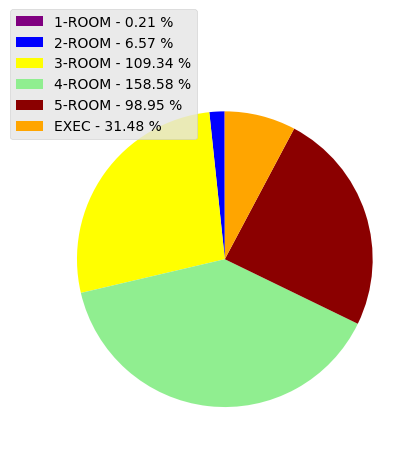

In [26]:


data = np.genfromtxt('./datasets/number-of-resale-applications-registered-by-flat-type.csv', dtype=['U8','U8','i8'],delimiter= ',',names=True)

for i in range(len(data)):
    if data["flat_type"][i] == "1-room":
        data["flat_type"][i] = '1-ROOM'
    elif data["flat_type"][i] == '2-room':
        data["flat_type"][i] = '2-ROOM'
    elif data['flat_type'][i] == '3-room':
        data["flat_type"][i] = '3-ROOM'
    elif data['flat_type'][i] == '4-room':
        data["flat_type"][i] = '4-ROOM'
    elif data['flat_type'][i] == '5-room':
        data['flat_type'][i] = '5-ROOM'
    elif data['flat_type'][i] == 'Executiv':
        data['flat_type'][i] = "EXEC"


unique_years = np.unique([row[0][:4] for row in data])
data_2020_onwards = []
for i in data:
    year_quarter = i[0]  # Assuming the "year-quarter" column is at index 0 in each tuple
    
    if year_quarter[:4] >= '2017':
        data_2020_onwards.append(i)


flat = np.unique([data[1] for data in data_2020_onwards])
print(flat)
numbers = []
for i in flat:
    indicies = np.where(data['flat_type'] == i)
    numbers.append(data[indicies]['no_of_resale_applications'].sum())

# Changes sums into percentages
for i in range(len(numbers)):
    numbers[i] = numbers[i]/1000

colors = ["purple","blue","yellow","lightgreen","darkred","orange"]
labels = ['{0} - {1:1.2f} %'.format(i, j) for i, j in zip(flat,numbers)]
fig = plt.pie(numbers,startangle=90,colors=colors)
plt.legend(fig,labels=labels,loc='center left', bbox_to_anchor = (-0.1,1.))
plt.show()



## **References**
<hr>
URLS:<br> 
https://data.gov.sg/dataset/resale-flat-prices<br>
https://data.gov.sg/dataset/median-rent-by-town-and-flat-type 